In [1]:
# imports
import market_status as ms
from IPython.display import display_html
import pandas as pd
import datetime as dt
import os

***
# **Market Status Notebook**
This notebook aims to provide comprehensive status of the market, which direction its heading and which sector is stronger than the other. All required code is written in python script ```market_status.py``` to save space. All days used in this notebook are meant as **trading** days.

**Stuff to implement**
- Options status for major indices
- Distribution days for indices (based on the "How to Make Money in Stocks" book)
- ~~Add Nasdaq to indices overview (remove double stochastic, keep only VFI)~~
- Recent IPOs (use finviz screener) with basic stats (IPO date, industry)
- Crypto status (only the big ones compared to USD = BTC, ETH, další?)
- Add small cheatsheet what to look for with each notebook section

**Basic information** 
<br>
Market is open every weekday from 09:30 to 16:00 EST (15:30 to 22:00 CET)
<br>
Holidays (when market is closed)
<table>
<thead>
<tr>
<th>Date</th>
<th>Weekday</th>
<th>Note</th>
</tr>
</thead>
<tbody>
<tr>
<td>24/11/2022</td>
<td>Thursday</td>
<td>Closes at 13:00</td>
</tr>
<tr>
<td>26/12/2022</td>
<td>Monday</td>
<td>-</td>
</tr>
</tbody>
</table>


## **World Markets**

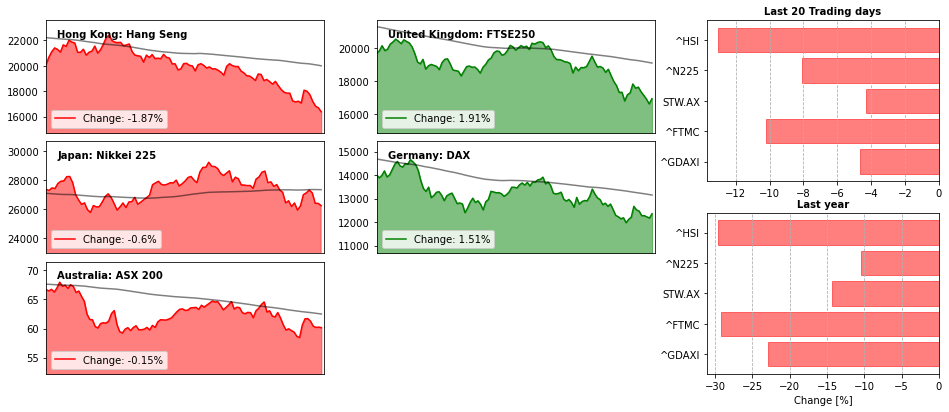

In [2]:
ms.worldmarkets()

***
## **US markets**
Spy = ETF following S&P500, IWM = ETF following Russell 2000
<br>
Follow the price action. How is the price and volume evolving? Any clear support or resistance soon? How is the new highs/new lows indicator acting compared to the overall market?

Last update done: 14-10-2022 at 09:17:59


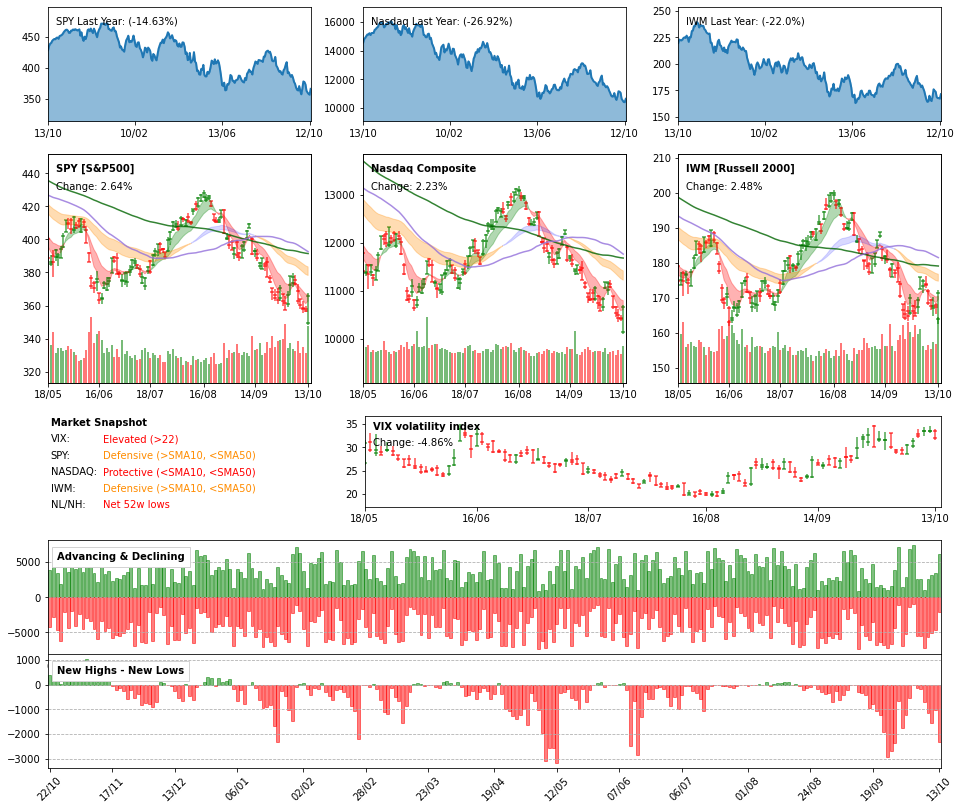

In [3]:
ms.usmarkets()

***
## **Sectors**
Explanations:
- Consumer Discretionary (cyclical) = goods and services that are considered non-essential by consumers, but desirable
- Consumer Staples (non-cyclical, defensive) = set of essential products used by consumers. This category includes things like foods and beverages, household goods, and hygiene products as well as alcohol and tobacco. 

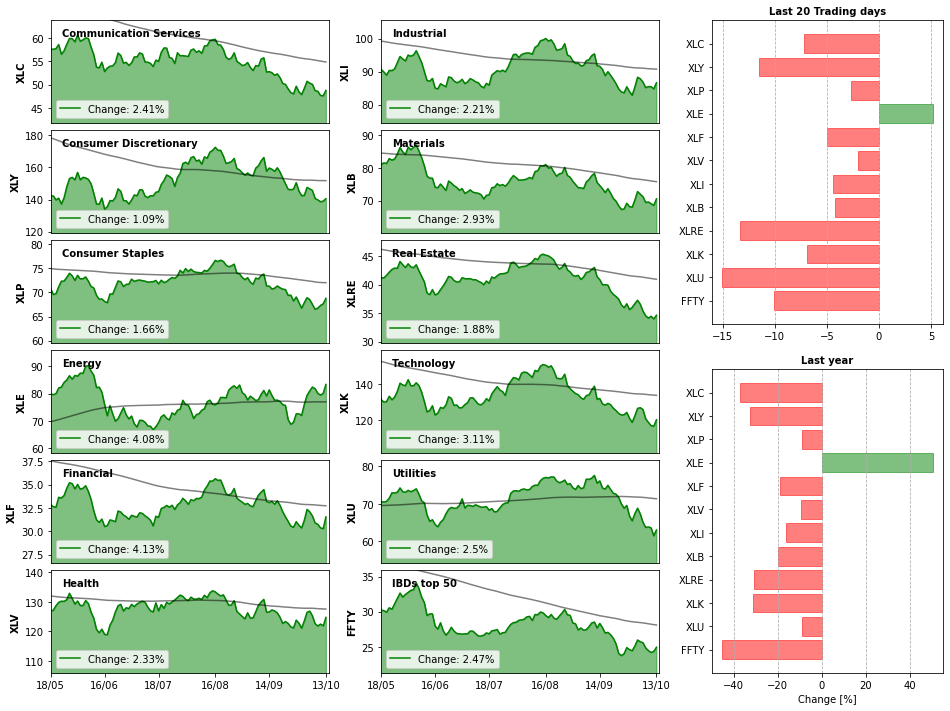

In [4]:
ms.sectors()

### Industries
Following tables are 20 best performing industries in last month followed by 10 worst performing indistries. Both tables are sorted by descending performance over last month.
<br>
Any industry shows relative strength compared to rest of the market? This could be potential winner for next cycle.

In [5]:
ind = ms.industries(sf=True, rank=True)
display_html(ind.prettify(ind.table.iloc[:20,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
Coking Coal,2.08,12.17,-12.08,49.11,0.85,1.45,0
Oil & Gas Refining & Marketing,1.03,8.78,14.52,34.72,1.03,4.13,1
Paper & Paper Products,1.17,4.11,-12.71,-0.89,1.65,2.02,2
Silver,-7.55,3.62,-40.74,-33.29,1.25,-0.96,-2
Oil & Gas Equipment & Services,1.72,2.42,-14.59,16.58,1.17,5.25,2
Steel,3.82,2.22,-28.33,-9.72,0.92,2.82,49
Residential Construction,-5.00,2.15,-7.67,-20.79,1.13,-0.27,-1
Home Improvement Retail,-2.89,1.40,-8.37,-15.39,1.19,0.45,1
Thermal Coal,-4.38,1.37,6.15,72.40,0.74,0.69,-5
Medical Distribution,0.04,1.29,-4.36,34.12,1.46,2.35,7


In [6]:
display_html(ind.prettify(ind.table.iloc[-10:,:])._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Position
REIT - Office,-1.17,-15.59,-38.02,-38.02,1.38,2.51,2
Utilities - Regulated Electric,-3.25,-15.71,-15.50,-3.49,1.47,2.37,-5
Utilities - Renewable,-4.56,-16.28,-10.52,-9.93,1.21,1.71,-8
Utilities - Diversified,-2.48,-16.70,-21.80,-3.91,1.42,2.84,-2
REIT - Healthcare Facilities,-0.61,-17.04,-32.39,-28.88,1.11,2.13,0
REIT - Specialty,-4.41,-18.95,-27.52,-24.61,1.27,2.28,2
Uranium,-11.34,-21.48,-32.69,-20.04,1.41,2.36,0
Auto Manufacturers,-5.47,-21.87,-30.88,-28.34,1.02,1.63,-2
REIT - Mortgage,1.33,-22.05,-30.90,-41.03,1.48,1.43,0
Solar,-7.13,-25.33,8.15,-10.63,1.21,-0.14,0


In [7]:
display_html(ind.prettify2(ind.volumechange())._repr_html_(), raw=True)

Name,Perf Week,Perf Month,Perf Half,Perf Year,Rel Volume,Change,Volprice product
Pharmaceutical Retailers,3.88,-4.15,-26.02,-31.85,2.18,5.14,11.205200
Grocery Stores,7.32,-2.17,-13.86,5.40,2.80,4.00,11.200000
Insurance - Property & Casualty,2.45,0.14,-7.00,7.52,3.00,3.21,9.630000
Electronic Components,-4.57,-7.94,-7.59,-15.96,3.52,2.59,9.116800
Banks - Diversified,-0.00,-8.18,-18.32,-24.90,1.58,4.92,7.773600
Insurance - Life,0.56,-1.63,-14.18,-13.54,1.45,4.61,6.684500
Insurance - Reinsurance,0.91,-1.58,-0.61,0.49,1.23,5.05,6.211500
Oil & Gas Equipment & Services,1.72,2.42,-14.59,16.58,1.17,5.25,6.142500
Insurance - Diversified,-0.25,-1.44,-19.57,-2.53,1.31,4.15,5.436500
Banks - Regional,-0.20,-4.04,-9.33,-15.02,1.46,3.67,5.358200


***
## **Futures**
Selected commodities futures. 
Will add also column for a relative year performance, but currently scrapper has a problem that the ethanol returns Null value.

In [8]:
futures = ms.futures()
data_futures = futures.returnfutures()
display_html(futures.prettify(data_futures.iloc[:12,:])._repr_html_()+"\xa0\xa0\xa0"+futures.prettify(data_futures.iloc[12:,:])._repr_html_(), raw=True)

IndexError: list index out of range

***
## **Crypto & Forex**

In [ ]:
# outptut table with cryptos and their preformance in last day/week/month

***
## **New IPOs**
New companies on the market during the last month, look for interesting price changes or so

---
**Run check:** Checks if the code run well <br>
**Saving:** Following code is for saving the notebook into the HTML file for easy reading and sharing. Need to be done manually, when notebook finishes running!


In [ ]:
# run check

In [ ]:
# save
os.system("jupyter nbconvert --to html --template classic market_status.ipynb")

0